Create Histogram:直接统计像素个数；或调用cv.calcHist

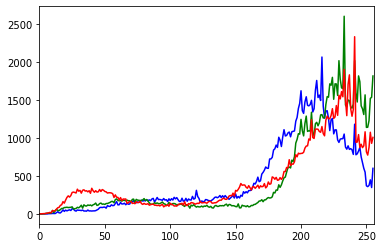

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def custom_hist(gray):
    h, w = gray.shape
    hist = np.zeros([256], dtype=np.int32)
    for row in range(h):
        for col in range(w):
            pv = gray[row, col]
            hist[pv] += 1

    y_pos = np.arange(0, 256, 1, dtype=np.int32)
    plt.bar(y_pos, hist, align='center', color='r', alpha=0.5)
    plt.xticks(y_pos, y_pos)
    plt.ylabel('Frequency')
    plt.title('Histogram')

    # plt.plot(hist, color='r')
    # plt.xlim([0, 256])
    plt.show()


def image_hist(image):
    cv.imshow("input", image)
    color = ('blue', 'green', 'red')
    for i, color in enumerate(color):
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()


src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
cv.imshow("input", gray)
#custom_hist(gray)
image_hist(src)
cv.waitKey(0)
cv.destroyAllWindows()

直方图均衡：cv.equalizeHist

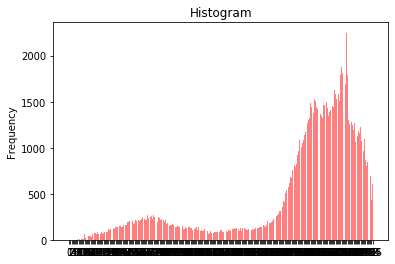

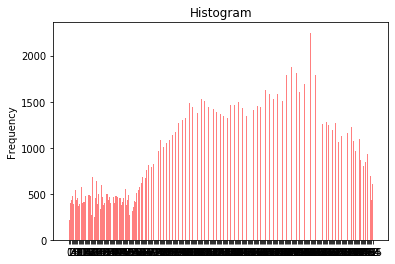

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def custom_hist(gray):
    h, w = gray.shape
    hist = np.zeros([256], dtype=np.int32)
    for row in range(h):
        for col in range(w):
            pv = gray[row, col]
            hist[pv] += 1

    y_pos = np.arange(0, 256, 1, dtype=np.int32)
    plt.bar(y_pos, hist, align='center', color='r', alpha=0.5)
    plt.xticks(y_pos, y_pos)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()


src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", gray)
dst = cv.equalizeHist(gray)
cv.imshow("eh", dst)

custom_hist(gray)
custom_hist(dst)

cv.waitKey(0)
cv.destroyAllWindows()

直方图比较：cv.compareHist

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 

src1 = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png") 
src2 = cv.imread("C:/Users/86188/Desktop/test/other/yuanz.png") 
src3 = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png") 
src4 = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png") 

hsv1 = cv.cvtColor(src1, cv.COLOR_BGR2HSV)
hsv2 = cv.cvtColor(src2, cv.COLOR_BGR2HSV)
hsv3 = cv.cvtColor(src3, cv.COLOR_BGR2HSV)
hsv4 = cv.cvtColor(src4, cv.COLOR_BGR2HSV)

hist1 = cv.calcHist([hsv1], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist2 = cv.calcHist([hsv2], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist3 = cv.calcHist([hsv3], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist4 = cv.calcHist([hsv4], [0, 1], None, [60, 64], [0, 180, 0, 256])

cv.normalize(hist1, hist1, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist2, hist2, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist3, hist3, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist4, hist4, 0, 1.0, cv.NORM_MINMAX)

methods = [cv.HISTCMP_CORREL, cv.HISTCMP_CHISQR,
           cv.HISTCMP_INTERSECT, cv.HISTCMP_BHATTACHARYYA]
str_method = ""
for method in methods:
    src1_src2 = cv.compareHist(hist1, hist2, method)
    src3_src4 = cv.compareHist(hist3, hist4, method)
    if method == cv.HISTCMP_CORREL:
        str_method = "Correlation"
    if method == cv.HISTCMP_CHISQR:
        str_method = "Chi-square"
    if method == cv.HISTCMP_INTERSECT:
        str_method = "Intersection"
    if method == cv.HISTCMP_BHATTACHARYYA:
        str_method = "Bhattacharyya"

    print("%s src1_src2 = %.2f, src3_src4 = %.2f"%(str_method, src1_src2, src3_src4))


cv.waitKey(0)
cv.destroyAllWindows()

Correlation src1_src2 = 0.40, src3_src4 = 1.00
Chi-square src1_src2 = 1098.45, src3_src4 = 0.00
Intersection src1_src2 = 21.45, src3_src4 = 36.24
Bhattacharyya src1_src2 = 0.51, src3_src4 = 0.00


反向投影，从目标图像中找到投影目标：cv.calcBackProject

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def back_projection_demo():
    sample = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
    # hist2d_demo(sample)
    target = cv.imread("C:/Users/86188/Desktop/test/other/yuanz.png")
    # hist2d_demo(target)
    roi_hsv = cv.cvtColor(sample, cv.COLOR_BGR2HSV)
    target_hsv = cv.cvtColor(target, cv.COLOR_BGR2HSV)

    # show images
    cv.imshow("sample", sample)
    cv.imshow("target", target)

    roiHist = cv.calcHist([roi_hsv], [0, 1], None, [32, 32], [0, 180, 0, 256])
    cv.normalize(roiHist, roiHist, 0, 255, cv.NORM_MINMAX)
    dst = cv.calcBackProject([target_hsv], [0, 1], roiHist, [0, 180, 0, 256], 1)
    cv.imshow("backProjectionDemo", dst)


def hist2d_demo(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hist = cv.calcHist([hsv], [0, 1], None, [32, 32], [0, 180, 0, 256])
    dst = cv.resize(hist, (400, 400))
    cv.imshow("image", image)
    cv.imshow("hist", dst)
    plt.imshow(hist, interpolation='nearest')
    plt.title("2D Histogram")
    plt.show()


back_projection_demo()
cv.waitKey(0)

cv.destroyAllWindows()

convolution

In [ ]:
import cv2 as cv
import numpy as np


def custom_blur(src):
    h, w, ch = src.shape
    print("h , w, ch", h, w, ch)
    result = np.copy(src)
    for row in range(1, h-1, 1):
        for col in range(1, w-1, 1):
            v1 = np.int32(src[row-1, col-1])
            v2 = np.int32(src[row-1, col])
            v3 = np.int32(src[row-1, col+1])
            v4 = np.int32(src[row, col-1])
            v5 = np.int32(src[row, col])
            v6 = np.int32(src[row, col+1])
            v7 = np.int32(src[row+1, col-1])
            v8 = np.int32(src[row+1, col])
            v9 = np.int32(src[row+1, col+1])

            b = v1[0] + v2[0] + v3[0] + v4[0] + v5[0] + v6[0] + v7[0] + v8[0] + v9[0];
            g = v1[1] + v2[1] + v3[1] + v4[1] + v5[1] + v6[1] + v7[1] + v8[1] + v9[1];
            r = v1[2] + v2[2] + v3[2] + v4[2] + v5[2] + v6[2] + v7[2] + v8[2] + v9[2];
            result[row, col] = [b//9, g//9, r//9]
    cv.imshow("result", result)


src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", src)
dst = cv.blur(src, (15, 15))
cv.imshow("blur", dst)
custom_blur(src)
cv.waitKey(0)
cv.destroyAllWindows()

均值，高斯，中值：cv.blur cv.GaussianBlur（去除随机噪声） cv.medianBlur(去除椒盐噪声）  cv.fastNlMeansDenoisingColored（快速非局部平均去噪）

In [2]:
import cv2 as cv
import numpy as np


src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png",0)
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", src)

dst1 = cv.blur(src, (5, 5))
dst2 = cv.GaussianBlur(src, (5, 5), sigmaX=15)
dst3 = cv.GaussianBlur(src, (0, 0), sigmaX=15)
dst4=cv.medianBlur(src,5)

cv.imshow("blur ksize=5", dst1)
cv.imshow("gaussian ksize=5", dst2)
cv.imshow("gaussian sigmax=15", dst3)
cv.imshow("median bulr",dst4)

cv.waitKey(0)
cv.destroyAllWindows()


添加噪声: salt_pepper_noise gaussian_noise   cv.putText

In [5]:
import cv2 as cv
import numpy as np


def add_salt_pepper_noise(image):
    h, w = image.shape[:2]
    nums = 10000
    rows = np.random.randint(0, h, nums, dtype=np.int)
    cols = np.random.randint(0, w, nums, dtype=np.int)
    for i in range(nums):
        if i % 2 == 1:
            image[rows[i], cols[i]] = (255, 255, 255)
        else:
            image[rows[i], cols[i]] = (0, 0, 0)
    return image


def gaussian_noise(image):
    noise = np.zeros(image.shape, image.dtype)
    m = (15, 15, 15)
    s = (30, 30, 30)
    cv.randn(noise, m, s)
    dst = cv.add(image, noise)
    cv.imshow("gaussian noise", dst)
    return dst


src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
h, w = src.shape[:2]
copy = np.copy(src)
copy = add_salt_pepper_noise(copy)
gn=gaussian_noise(src)

result = np.zeros([h, w*2, 3], dtype=src.dtype)
result[0:h,0:w,:] = src
result[0:h,w:2*w,:] = copy
cv.putText(result, "original image", (10, 30), cv.FONT_HERSHEY_PLAIN, 2.0, (0, 255, 255), 1)
cv.putText(result, "salt pepper image", (w+10, 30), cv.FONT_HERSHEY_PLAIN, 2.0, (0, 255, 255), 1)
cv.imshow("salt pepper noise", result)

cv.waitKey(0)
cv.destroyAllWindows()

去噪的一个例子

In [7]:
import cv2 as cv
import cv2 as cv
import numpy as np


def add_salt_pepper_noise(image):
    h, w = image.shape[:2]
    nums = 10000
    rows = np.random.randint(0, h, nums, dtype=np.int)
    cols = np.random.randint(0, w, nums, dtype=np.int)
    for i in range(nums):
        if i % 2 == 1:
            image[rows[i], cols[i]] = (255, 255, 255)
        else:
            image[rows[i], cols[i]] = (0, 0, 0)
    return image


def gaussian_noise(image):
    noise = np.zeros(image.shape, image.dtype)
    m = (15, 15, 15)
    s = (30, 30, 30)
    cv.randn(noise, m, s)
    dst = cv.add(image, noise)
    cv.imshow("gaussian noise", dst)
    return dst


src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
cv.imshow("input", src)
h, w = src.shape[:2]
src = gaussian_noise(src)

result1 = cv.blur(src, (5, 5))
cv.imshow("result-1", result1)

result2 = cv.GaussianBlur(src, (5, 5), 0)
cv.imshow("result-2", result2)

result3 = cv.medianBlur(src, 5)
cv.imshow("result-3", result3)

result4 = cv.fastNlMeansDenoisingColored(src, None, 15, 15, 10, 30)
cv.imshow("result-4", result4)

cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
双边滤波，同时考虑空间邻近度和像素相似度：cv.bilateralFilter

In [13]:
import cv2 as cv
import numpy as np

def gaussian_noise(image):
    noise = np.zeros(image.shape, image.dtype)
    m = (15, 15, 15)
    s = (30, 30, 30)
    cv.randn(noise, m, s)
    dst = cv.add(image, noise)
    #cv.imshow("gaussian noise", dst)
    return dst

src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
noise = gaussian_noise(src)

h, w = src.shape[:2]
dst1 = cv.bilateralFilter(noise, 0, 100, 10)
dst2 = cv.GaussianBlur(noise, (5, 5), sigmaX=15)
result = np.zeros([h, w*3, 3], dtype=src.dtype)
result[0:h,0:w,:] = noise
result[0:h,w:2*w,:] = dst1
result[0:h,2*w:3*w,:] = dst2
cv.imshow("result", result)

cv.waitKey(0)
cv.destroyAllWindows()


In [14]:
integral fast blur  绘制积分图

In [7]:
import cv2 as cv
import numpy as np


def get_block_sum(ii, x1, y1, x2, y2, index):
    tl = ii[y1, x1][index]
    tr = ii[y2, x1][index]
    bl = ii[y1, x2][index]
    br = ii[y2, x2][index]
    s = (br - bl - tr + tl)
    return s


def blur_demo(image, ii):
    h, w, dims = image.shape
    result = np.zeros(image.shape, image.dtype)
    ksize = 15
    radius = ksize // 2
    for row in range(0, h + radius, 1):
        y2 = h if (row + 1)> h else (row + 1)
        y1 = 0 if (row - ksize) < 0 else (row - ksize)
        for col in range(0, w + radius, 1):
            x2 = w if (col + 1)>w else (col + 1)
            x1 = 0 if (col - ksize) < 0 else (col - ksize)
            cx = 0 if (col - radius) < 0 else (col - radius)
            cy = 0 if (row - radius) < 0 else (row - radius)
            num = (x2 - x1)*(y2 - y1)
            for i in range(0, 3, 1):
                s = get_block_sum(ii, x1, y1, x2, y2, i)
                result[cy, cx][i] = s // num 

    cv.imshow("integral fast blur", result)
    # cv.imwrite("./result.png", result)


src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", src)
sum_table = cv.integral(src, sdepth=cv.CV_32F)
cv.normalize(sum_table, sum_table, alpha=0, beta=1.0, norm_type=cv.NORM_MINMAX)
cv.imshow("out",np.uint8(sum_table*255))
#blur_demo(src, sum_table)

cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
边缘保留过滤器：cv.edgePreservingFilter

In [3]:
import cv2 as cv
import numpy as np

src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", src)

h, w = src.shape[:2]
dst = cv.edgePreservingFilter(src, sigma_s=100, sigma_r=0.4, flags=cv.RECURS_FILTER)
result = np.zeros([h, w*2, 3], dtype=src.dtype)
result[0:h,0:w,:] = src
result[0:h,w:2*w,:] = dst
cv.imshow("result", result)


cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
自定义滤波器

In [9]:
import cv2 as cv
import numpy as np

src = cv.imread("C:/Users/86188/Desktop/test/other/shihuang.png")
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", src)

blur_op = np.ones([5, 5], dtype=np.float32)/25.
shape_op = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], np.float32)
grad_op = np.array([[1, 0],[0, -1]], dtype=np.float32)

dst1 = cv.filter2D(src, -1, blur_op)
dst2 = cv.filter2D(src, -1, shape_op)
dst3 = cv.filter2D(src, cv.CV_32F, grad_op)
dst3 = cv.convertScaleAbs(dst3)

cv.imshow("blur=5x5", dst1);
cv.imshow("shape=3x3", dst2);
cv.imshow("gradient=2x2", dst3);

cv.waitKey(0)
cv.destroyAllWindows()